### 线性回归简介

线性回归是一种用于预测和建模的基本机器学习算法。它通过建立输入特征与输出变量之间的线性关系来进行预测。

#### 1. 基本概念

- **目标**: 预测一个连续的数值（例如房价、温度等）。
- **模型形式**: 线性回归模型的基本形式为：
  
  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

  其中：
  - $ y $ 是预测值（因变量）。
  - $x_1, x_2, \ldots, x_n$ 是输入特征（自变量）。
  - $\beta_0$ 是截距项。
  - $\beta_1, \beta_2, \ldots, \beta_n$ 是特征的权重（系数）。
  - $\epsilon$ 是误差项。

#### 2. 线性回归的类型

- **简单线性回归**: 只有一个特征（自变量）。
  
  $$ y = \beta_0 + \beta_1 x + \epsilon $$

- **多元线性回归**: 有多个特征（自变量）。

#### 3. 训练过程

- **损失函数**: 通常使用均方误差（MSE）作为损失函数，用于评估模型的预测性能：

  $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  其中，$y_i$ 是真实值，$\hat{y}_i$ 是预测值。

- **优化方法**: 通过最小化损失函数来优化模型参数（如使用梯度下降法）。

#### 4. 优点与缺点

- **优点**:
  - 简单易懂，易于实现和解释。
  - 计算效率高，适用于大规模数据集。

- **缺点**:
  - 对线性关系的假设，无法处理复杂的非线性关系。
  - 对异常值敏感，可能影响模型的性能。

#### 5. 应用场景

- 房价预测
- 销售额预测
- 经济指标分析

### 总结

线性回归是机器学习中一种基础而重要的算法，适用于许多实际问题。虽然它有一些局限性，但在许多情况下，仍然是一个有效的预测工具。

In [1]:
# pip install sklearn
# pip install numpy
# pip install matplotlib

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## 数据集介绍
+ Automobile - https://archive.ics.uci.edu/dataset/10/automobile

该数据集包含三类实体：(a) 汽车各项特性的规格说明，(b) 其指定的​​保险风险评级，(c) 与其他汽车相比，其标准化使用损失。第二个评级对应于汽车风险高于其价格的程度。汽车最初会被分配一个与其价格相关的风险因子符号。然后，如果汽车风险较高（或较低），则通过上调（或下调）该符号来调整。精算师将此过程称为“符号化”。+3 表示汽车风险较高，-3 表示汽车可能相当安全。

第三个因子是每辆投保车辆每年的相对平均损失赔付。该值针对特定尺寸类别（双门小型车、旅行车、运动型/特种车等）内的所有汽车进行了标准化，代表每辆车每年的平均损失。


| Attribute                | Attribute Range                                  |
|--------------------------|--------------------------------------------------|
| 1. symboling             | -3, -2, -1, 0, 1, 2, 3.(风险指数)|
| 2. normalized-losses     | continuous from 65 to 256.(每年的相对平均损失赔付)|
| 3. make                  | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugeot, renault, saab, subaru, toyota, volkswagen, volvoplymouth, porsche(汽车品牌)|
| 4. fuel-type             | diesel, gas.(发动机类型)|
| 5. aspiration            | std, turbo.                                      |
| 6. num-of-doors          | four, two.                                       |
| 7. body-style            | hardtop, wagon, sedan, hatchback, convertible.   |
| 8. drive-wheels          | 4wd, fwd, rwd.                                   |
| 9. engine-location       | front, rear.                                     |
| 10. wheel-base           | continuous from 86.6 to 120.9.                   |
| 11. length               | continuous from 141.1 to 208.1.                  |
| 12. width                | continuous from 60.3 to 72.3.                    |
| 13. height               | continuous from 47.8 to 59.8.                    |
| 14. curb-weight          | continuous from 1488 to 4066.(整备质量)|
| 15. engine-type          | dohc, dohcv, l, ohc, ohcf, ohcv, rotor.          |
| 16. num-of-cylinders     | eight, five, four, six, three, twelve, two.      |
| 17. engine-size          | continuous from 61 to 326.(发动机大小)|
| 18. fuel-system          | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.    |
| 19. bore                 | continuous from 2.54 to 3.94.                     |
| 20. stroke               | continuous from 2.07 to 4.17.(冲程)|
| 21. compression-ratio    | continuous from 7 to 23.(压缩比)|
| 22. horsepower           | continuous from 48 to 288.(马力)|
| 23. peak-rpm             | continuous from 4150 to 6600.(峰值转速)|
| 24. city-mpg             | continuous from 13 to 49.(城市每加仑英里数)|
| 25. highway-mpg          | continuous from 16 to 54.(高速每加仑英里数)|
| 26. price                | continuous from 5118 to 45400.(售价)|

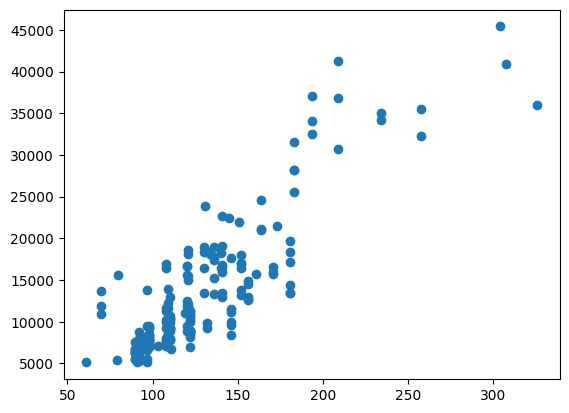

In [2]:
data = np.genfromtxt('datasets/automobile/imports-85.csv', delimiter=',')

# 使用布尔索引过滤 NaN 值
mask = ~np.isnan(data[:, 16]) & ~np.isnan(data[:, 25])

# 提取有效的 x_data 和 y_data
x_data = data[mask, 16]
y_data = data[mask, 25]

plt.scatter(x=x_data, y=y_data)
plt.show()

In [3]:
_x_data = data[mask, 16][:, np.newaxis]  # 增加一个维度
_y_data = data[mask, 25][:, np.newaxis]  # 增加一个维度
model = LinearRegression()
model.fit(_x_data, _y_data)

LinearRegression()

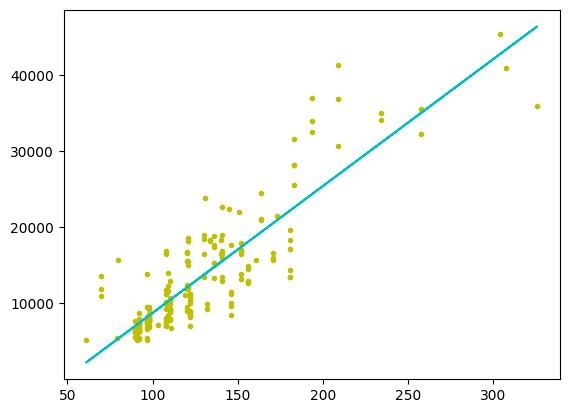

In [4]:
plt.plot(_x_data, _y_data, 'y.')
plt.plot(_x_data, model.predict(_x_data), 'c')
plt.show()

### 梯度下降法实现线性回归模型

1. **损失函数**：
   该代码的目的是最小化均方误差（MSE），其公式为：

   $$
   \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - (k \cdot x^{(i)} + b))^2
   $$

   其中：
   - $y^{(i)}$ 是第 $i$ 个样本的真实值。
   - $x^{(i)}$ 是第 $i$ 个样本的特征值。
   - $m$ 是样本的总数。

2. **梯度计算**：
   为了更新参数 $b$ 和 $k$，我们需要计算损失函数相对于这些参数的梯度。

   - **对于截距 $b$** 的梯度：

   $$
   \frac{\partial \text{MSE}}{\partial b} = -\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - (k \cdot x^{(i)} + b))
   $$

   - **对于斜率 $k$** 的梯度：

   $$
   \frac{\partial \text{MSE}}{\partial k} = -\frac{1}{m} \sum_{i=1}^{m} x^{(i)} (y^{(i)} - (k \cdot x^{(i)} + b))
   $$

3. **参数更新**：
   使用计算得到的梯度来更新参数 $b$ 和 $k$：

   - 更新截距 $b$ 的公式：

   $$
   b := b - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial b}
   $$

   - 更新斜率 $k$ 的公式：

   $$
   k := k - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial k}
   $$

### 总结

综上所述，代码中实现的梯度下降算法通过计算损失函数（均方误差）关于参数 $b$ 和 $k$ 的梯度，并使用这些梯度来更新参数，以最小化损失函数，从而优化线性回归模型的性能。

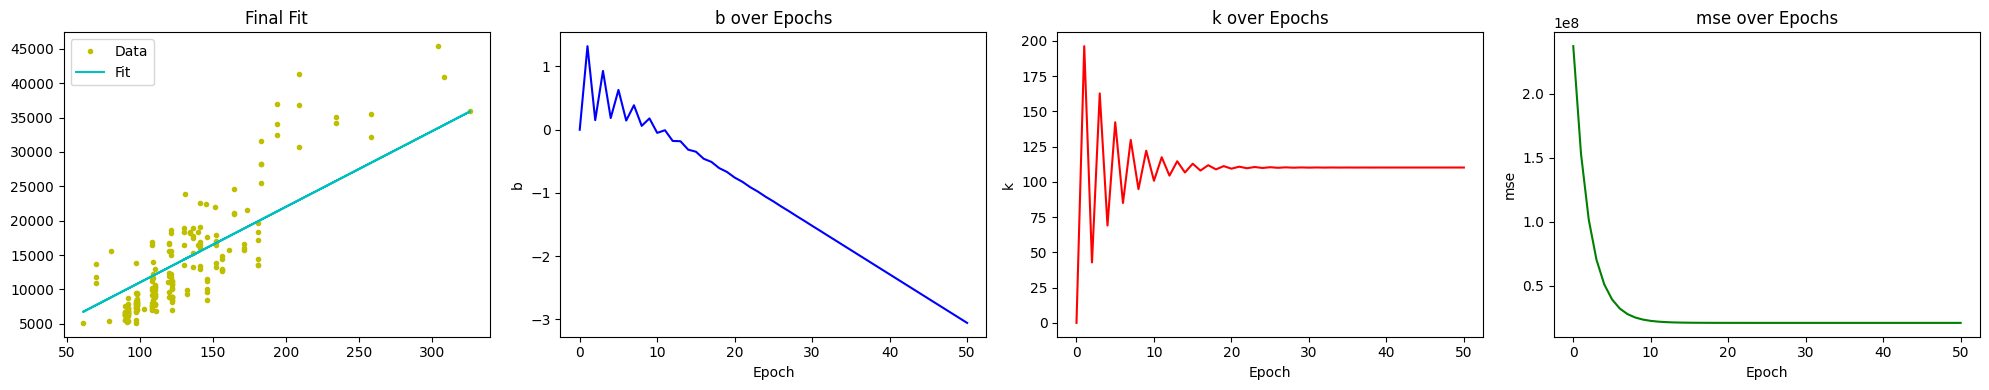

In [5]:
# 学习率
lr = 0.0001
# 截距
b = 0
# 斜率
k = 0
# 最大迭代次数
epochs = 50

# 计算均方误差（MSE）
def compute_mse(b, k, x_data, y_data):
    total_error = 0
    for i in range(len(x_data)):
        total_error += (y_data[i] - (k * x_data[i] + b)) ** 2
    return total_error / float(len(x_data))

def gradient_descent_runner(x_data, y_data, b, k, lr, epochs):
    m = float(len(x_data))
    b_history = [b]
    k_history = [k]
    mse_history = [compute_mse(b, k, x_data, y_data)]
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        for j in range(0, len(x_data)):
            b_grad += -(1/m) * (y_data[j] - ((k * x_data[j]) + b))
            k_grad += -(1/m) * x_data[j]  * (y_data[j] - ((k * x_data[j]) + b))
        b -= lr * b_grad
        k -= lr * k_grad
        b_history.append(b)
        k_history.append(k)
        mse_history.append(compute_mse(b, k, x_data, y_data))
    return b, k, b_history, k_history, mse_history

b, k, b_history, k_history, mse_history = gradient_descent_runner(x_data, y_data, b, k, lr, epochs)
# 拟合结果图
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(x_data, y_data, 'y.', label='Data')
plt.plot(x_data, [k * x + b for x in x_data], 'c', label='Fit')
plt.title('Final Fit')
plt.legend()

# b 变化图
plt.subplot(1, 4, 2)
plt.plot(b_history, 'b')
plt.title('b over Epochs')
plt.xlabel('Epoch')
plt.ylabel('b')

# k 变化图
plt.subplot(1, 4, 3)
plt.plot(k_history, 'r')
plt.title('k over Epochs')
plt.xlabel('Epoch')
plt.ylabel('k')

# mse 变化图
plt.subplot(1, 4, 4)
plt.plot(mse_history, 'g')
plt.title('mse over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mse')

plt.tight_layout()
plt.show()

### 👉 为什么`b`没有趋于一个常量值？

| 角度 | 解释 |
|------|------|
| 梯度公式 | $ \frac{\partial \text{Loss}}{\partial b} = -\frac{2}{m} \sum (y_i - (k x_i + b)) $， 只要预测误差不为 0，梯度就不为 0 |
| 原因 | 即使 `k` 已固定，`b` 仍在调整整体偏差，使残差均值更接近 0 |
| 本质 | 模型仍能继续减小损失函数（MSE） |
| 收敛条件 | 只有当误差残差和为 0，或学习率极小时，`b` 才能趋于常量 |

### 拓展链接
+ 偏导数 - https://zh.wikipedia.org/wiki/%E5%81%8F%E5%AF%BC%E6%95%B0
